# Исследование рынка общественного питания Москвы

- Автор: Нарыжный В.В.
- Дата: 12.04.2025

### Цели и задачи проекта

**Цель:** Провести исследовательский анализ рынка Москвы для выбора подходящего инвесторам места.   

**Задачи:**
1. Загрузка данных и знакомство с ними.
2. Предобработка данных.
3. Исследовательский анализ данных.
4. Итоговый вывод и рекомендации.

### Описание данных

Для анализа поступили данные о заведениях общественного питания. Данные состоят из двух датасетов:

- `rest_info.csv` — содержит информацию о заведениях общественного питания;
- `rest_price.csv` —  содержит информацию о среднем чеке в заведениях общественного питания.

### Описание датасета `rest_info.csv`

 - `name` — название заведения;
 - `address` — адрес заведения;
 - `district` — административный район, в котором находится заведение, например Центральный административный округ;
 - `category` — категория заведения, например «кафе», «пиццерия» или «кофейня»;
 - `hours` — информация о днях и часах работы;
 - `rating` — рейтинг заведения по оценкам пользователей в Яндекс Картах (высшая оценка — 5.0);
 - `chain` — число, выраженное 0 или 1, которое показывает, является ли заведение сетевым (для маленьких сетей могут встречаться ошибки): `0` — заведение не является сетевым; `1` — заведение является сетевым.
 - `seats` — количество посадочных мест.

### Описание датасета `rest_price.csv`

 - `price` — категория цен в заведении, например «средние», «ниже среднего», «выше среднего» и так далее;
 - `avg_bill` — строка, которая хранит среднюю стоимость заказа в виде диапазона, например:
«Средний счёт: 1000–1500 ₽»;
«Цена чашки капучино: 130–220 ₽»;
«Цена бокала пива: 400–600 ₽».
и так далее;
 - `middle_avg_bill` — число с оценкой среднего чека, которое указано только для значений из столбца avg_bill, начинающихся с подстроки «Средний счёт»:
Если в строке указан ценовой диапазон из двух значений, в столбец войдёт медиана этих двух значений.
Если в строке указано одно число — цена без диапазона, то в столбец войдёт это число.
Если значения нет или оно не начинается с подстроки «Средний счёт», то в столбец ничего не войдёт.
 - `middle_coffee_cup` — число с оценкой одной чашки капучино, которое указано только для значений из столбца avg_bill, начинающихся с подстроки «Цена одной чашки капучино»:
Если в строке указан ценовой диапазон из двух значений, в столбец войдёт медиана этих двух значений.
Если в строке указано одно число — цена без диапазона, то в столбец войдёт это число.
Если значения нет или оно не начинается с подстроки «Цена одной чашки капучино», то в столбец ничего не войдёт.

### Содержимое проекта

1. Загрузка данных и знакомство с ними.
2. Предобработка данных.
3. Исследовательский анализ данных.
4. Итоговые выводы.

---

## 1. Загрузка данных и знакомство с ними

- Начнём с загрузки библиотек и датасетов `rest_price.csv` и `rest_info.csv`. Будем использовать pandas и библиотеки визуализации данных matplotlib и seaborn, а также phik для построения матрицы корреляции. Данные датасетов сохраним в двух переменных: `price_df` и `info_df`.

In [1]:
!pip install phik

     |████████████████████████████████| 686 kB 1.4 MB/s eta 0:00:01


In [2]:
# Импортируем библиотеки
import pandas as pd

# Загружаем библиотеки для визуализации данных
import matplotlib.pyplot as plt
import seaborn as sns

# Загружаем библиотеку для расчёта коэффициента корреляции phi_k
from phik import phik_matrix

In [3]:
# Выгружаем данные в переменные price_df и info_df
info_df = pd.read_csv('https://code.s3.yandex.net/datasets/rest_info.csv')
price_df = pd.read_csv('https://code.s3.yandex.net/datasets/rest_price.csv')

Познакомимся с данными датасета `rest_info.csv` — выведем первые строки методом `head()`, а информацию о датафрейме методом `info()`:

In [4]:
# Выводим первые строки датафрейма на экран
info_df.head()

,id,name,category,address,district,hours,rating,chain,seats
0,0c3e3439a8c64ea5bf6ecd6ca6ae19f0,WoWфли,кафе,"Москва, улица Дыбенко, 7/1",Северный административный округ,"ежедневно, 10:00–22:00",5.0,0,NaN
1,045780ada3474c57a2112e505d74b633,Четыре комнаты,ресторан,"Москва, улица Дыбенко, 36, корп. 1",Северный административный округ,"ежедневно, 10:00–22:00",4.5,0,4.0
2,1070b6b59144425896c65889347fcff6,Хазри,кафе,"Москва, Клязьминская улица, 15",Северный административный округ,"пн-чт 11:00–02:00; пт,сб 11:00–05:00; вс 11:00...",4.6,0,45.0
3,03ac7cd772104f65b58b349dc59f03ee,Dormouse Coffee Shop,кофейня,"Москва, улица Маршала Федоренко, 12",Северный административный округ,"ежедневно, 09:00–22:00",5.0,0,NaN
4,a163aada139c4c7f87b0b1c0b466a50f,Иль Марко,пиццерия,"Москва, Правобережная улица, 1Б",Северный административный округ,"ежедневно, 10:00–22:00",5.0,1,148.0


In [5]:
# Выводим информацию о датафрейме
info_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8406 entries, 0 to 8405
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        8406 non-null   object 
 1   name      8406 non-null   object 
 2   category  8406 non-null   object 
 3   address   8406 non-null   object 
 4   district  8406 non-null   object 
 5   hours     7870 non-null   object 
 6   rating    8406 non-null   float64
 7   chain     8406 non-null   int64  
 8   seats     4795 non-null   float64
dtypes: float64(2), int64(1), object(6)
memory usage: 591.2+ KB


In [6]:
# Выводим первые строки датафрейма на экран
price_df.head()

,id,price,avg_bill,middle_avg_bill,middle_coffee_cup
0,045780ada3474c57a2112e505d74b633,выше среднего,Средний счёт:1500–1600 ₽,1550.0,NaN
1,1070b6b59144425896c65889347fcff6,средние,Средний счёт:от 1000 ₽,1000.0,NaN
2,03ac7cd772104f65b58b349dc59f03ee,NaN,Цена чашки капучино:155–185 ₽,NaN,170.0
3,a163aada139c4c7f87b0b1c0b466a50f,средние,Средний счёт:400–600 ₽,500.0,NaN
4,8a343546b24e4a499ad96eb7d0797a8a,средние,NaN,NaN,NaN


In [7]:
# Выводим информацию о датафрейме
price_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4058 entries, 0 to 4057
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 4058 non-null   object 
 1   price              3315 non-null   object 
 2   avg_bill           3816 non-null   object 
 3   middle_avg_bill    3149 non-null   float64
 4   middle_coffee_cup  535 non-null    float64
dtypes: float64(2), object(3)
memory usage: 158.6+ KB


---

### Промежуточный вывод

Сделаем промежуточный вывод о полученных данных: данные какого объёма нам предоставили, соответствуют ли данные описанию, встречаются ли в них пропуски, используются ли верные типы данных. Отметим другие особенности данных, которые мы обнаружили на этой стадии и на которые стоит обратить внимание при предобработке.

Датасет `rest_info.csv` содержит 9 столбцов и 8406 строк, в которых представлена информация о заведениях общественного питания.

Изучим типы данных и их корректность:
- **Числовые значения с плавающей запятой (float64).** Один столбец, `seats`, содержит количество посадочных мест и представлен типом `float64`. Логичнее было бы использовать целочисленный тип (int).

- **Пропуски в данных.** 
   - В столбце `hours` пропущено 536 значений. В столбце `seats` пропущено 3611 значений.Так как пропуски могут повлиять на анализ, их нужно будет обработать.
- **Названия столбцов.**    
   - После анализа типов данных видно, что большинство столбцов корректно представлены. Названия столбцов в целом отражают содержимое данных.

Датасет `rest_price.csv` содержит 5 столбцов и 4058 строк, в которых представлена информация о среднем чеке в заведениях общественного питания.

Изучим типы данных и их корректность:
- **Типы данных.** 
 - Типы данных представленны корректно

- **Пропуски в данных.** 
   - В столбце `price ` пропущено 743 значений. В столбце `avg_bill ` пропущено 242 значений.В столбце `middle_avg_bill` пропущено 909 значений.В столбце `middle_coffee_cup` пропущено 3523 значений. Так как пропуски могут повлиять на анализ, их нужно будет обработать.
- **Названия столбцов.**    
   - После анализа типов данных видно, что большинство столбцов корректно представлены. Названия столбцов в целом отражают содержимое данных.

### Подготовка единого датафрейма

- Объединим данные двух датасетов в один, с которым мы и продолжим работу.

In [8]:
# Объединим два датасета в один с которым продолжим работу
df = pd.merge(info_df,price_df,on='id',how='left')

In [9]:
# Выведем данные 
df.head()

,id,name,category,address,district,hours,rating,chain,seats,price,avg_bill,middle_avg_bill,middle_coffee_cup
0,0c3e3439a8c64ea5bf6ecd6ca6ae19f0,WoWфли,кафе,"Москва, улица Дыбенко, 7/1",Северный административный округ,"ежедневно, 10:00–22:00",5.0,0,NaN,NaN,NaN,NaN,NaN
1,045780ada3474c57a2112e505d74b633,Четыре комнаты,ресторан,"Москва, улица Дыбенко, 36, корп. 1",Северный административный округ,"ежедневно, 10:00–22:00",4.5,0,4.0,выше среднего,Средний счёт:1500–1600 ₽,1550.0,NaN
2,1070b6b59144425896c65889347fcff6,Хазри,кафе,"Москва, Клязьминская улица, 15",Северный административный округ,"пн-чт 11:00–02:00; пт,сб 11:00–05:00; вс 11:00...",4.6,0,45.0,средние,Средний счёт:от 1000 ₽,1000.0,NaN
3,03ac7cd772104f65b58b349dc59f03ee,Dormouse Coffee Shop,кофейня,"Москва, улица Маршала Федоренко, 12",Северный административный округ,"ежедневно, 09:00–22:00",5.0,0,NaN,NaN,Цена чашки капучино:155–185 ₽,NaN,170.0
4,a163aada139c4c7f87b0b1c0b466a50f,Иль Марко,пиццерия,"Москва, Правобережная улица, 1Б",Северный административный округ,"ежедневно, 10:00–22:00",5.0,1,148.0,средние,Средний счёт:400–600 ₽,500.0,NaN


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8406 entries, 0 to 8405
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 8406 non-null   object 
 1   name               8406 non-null   object 
 2   category           8406 non-null   object 
 3   address            8406 non-null   object 
 4   district           8406 non-null   object 
 5   hours              7870 non-null   object 
 6   rating             8406 non-null   float64
 7   chain              8406 non-null   int64  
 8   seats              4795 non-null   float64
 9   price              3315 non-null   object 
 10  avg_bill           3816 non-null   object 
 11  middle_avg_bill    3149 non-null   float64
 12  middle_coffee_cup  535 non-null    float64
dtypes: float64(4), int64(1), object(8)
memory usage: 919.4+ KB


In [11]:
print(f'Размер info_df до объединения: {info_df.shape}')
print(f'Размер price_df до объединения: {price_df.shape}')
print(f'Размер объединенного датафрейма: {df.shape}')

Размер info_df до объединения: (8406, 9)
Размер price_df до объединения: (4058, 5)
Размер объединенного датафрейма: (8406, 13)


## 2. Предобработка данных

Подготовим данные к исследовательскому анализу:

- Изучим корректность типов данных и при необходимости проведем их преобразование.

Из описания видно что в данных встречаются корректные типы данных для дальнейшего анализа

- Изучим пропущенные значения в данных: посчитаем их количество в каждом столбце датафрейме, изучим данные с пропущенными значениями и предположм гипотезы их появления. Проведем обработку пропущенных значений.

Посчитаем количество пропусков в каждом столбце в абсолютных и относительных значениях.

In [12]:
# Считаем количество пропусков
missing_count = df.isna().sum()

In [13]:
# Выводим результат
missing_count

id                      0
name                    0
category                0
address                 0
district                0
hours                 536
rating                  0
chain                   0
seats                3611
price                5091
avg_bill             4590
middle_avg_bill      5257
middle_coffee_cup    7871
dtype: int64

In [14]:
# Считаем количество пропусков в процентах
missing_percent = round((df.isna().sum() / len(df)) * 100,2)

In [15]:
# Выводим результат
missing_percent

id                    0.00
name                  0.00
category              0.00
address               0.00
district              0.00
hours                 6.38
rating                0.00
chain                 0.00
seats                42.96
price                60.56
avg_bill             54.60
middle_avg_bill      62.54
middle_coffee_cup    93.64
dtype: float64

- **Столбцы с пропусками.**
  - `hours` 536 пропусков (6,38%).

  - `seats ` 3611 пропуска (42,96%).

  - `price` 5091 пропусков (60,56%).

  - `avg_bill` 4590 пропуска (54,60%).

  - `middle_avg_bill` 5257 пропусков (62,54%).

  - `middle_coffee_cup` 7871 пропусков (93,64%).

 - Пропуски могут быть связаны с отсутствием данных или ошибками при их сборе.
 - Заменим пропуски в `hours` и `price` на `Нет информации`, медианным значением в `seats`,в `avg_bill` пропуски оставим так как  `middle_avg_bill` и `middle_coffee_cup` заполним индикатором

In [16]:
# Заменим пропуски в hours и price на 'Нет информации' 
df['hours'] = df['hours'].fillna('Нет информации') 
df['price'] = df['price'].fillna('Нет информации')

In [17]:
# Создаем таблицу с медианами по категориям
median_table = df.groupby('category')['seats'].median().reset_index()
median_table.columns = ['category', 'median_seats']

# Объединяем таблицы
df = df.merge(median_table, on='category', how='left')

# Заполняем пропуски
df['seats'] = df['seats'].fillna(df['median_seats'])

In [18]:
# Для middle_avg_bill и middle_coffee_cup заполним индикатором
df['middle_avg_bill'] = df['middle_avg_bill'].fillna(-1)
df['middle_coffee_cup'] = df['middle_coffee_cup'].fillna(-1)

In [19]:
# Проверяем результат
df.isna().sum()

id                      0
name                    0
category                0
address                 0
district                0
hours                   0
rating                  0
chain                   0
seats                   0
price                   0
avg_bill             4590
middle_avg_bill         0
middle_coffee_cup       0
median_seats            0
dtype: int64

- Проверим данные на явные и неявные дубликаты, например поля с названием и адресом заведения. Для оптимизации проверки нормализуем данные в текстовых столбцах, например с названием заведения.

In [20]:
# Проверяем дубликаты
duplicates = df[df.duplicated(keep=False)]

In [21]:
# выводим результат
duplicates.head()

,id,name,category,address,district,hours,rating,chain,seats,price,avg_bill,middle_avg_bill,middle_coffee_cup,median_seats


В датафрейме нет полных дубликатов строк. Проверим неявные дубликаты,нормализуем данные в текстовых столбцах, например с названием и адресом заведения:

In [22]:
# Нормализуем данные в текстовых столбцах
df['name_lower'] = df['name'].str.lower()
df['address_lower'] = df['address'].str.lower()

In [23]:
# Проверим результат
df[['name_lower','address_lower']].head()

,name_lower,address_lower
0,wowфли,"москва, улица дыбенко, 7/1"
1,четыре комнаты,"москва, улица дыбенко, 36, корп. 1"
2,хазри,"москва, клязьминская улица, 15"
3,dormouse coffee shop,"москва, улица маршала федоренко, 12"
4,иль марко,"москва, правобережная улица, 1б"


In [24]:
# Проверяем дубликаты
duplicates = df[df.duplicated(['name_lower', 'address_lower'], keep=False)]

In [25]:
# Выводим количество
f'Количество дубликатов : {len(duplicates)}'

'Количество дубликатов : 8'

In [26]:
# Удаляем дубликаты
df = df.drop_duplicates(['name_lower', 'address_lower'])

In [27]:
# Проверяем результат
len(df)

8402

- Напишем промежуточный вывод: укажем количество найденных дубликатов и действия по их обработке.

- **Неявные дубликаты.** 
  - Устранили. Нормализовали данные в текстовых столбцах
- **Явные дубликаты.** 
  - Явных дубликатов нет
  
- Данные нормализовали.Нормализовали данные в текстовых столбцах,неявные дубликаты устранили

- Для дальнейшей работы создадим столбец `is_24_7` с обозначением того, что заведение работает ежедневно и круглосуточно, то есть 24/7:
  - логическое значение `True` — если заведение работает ежедневно и круглосуточно;
  - логическое значение `False` — в противоположном случае.

In [28]:
# Проверим значения в столбце hours
df['hours'].sort_values().unique()

array(['Нет информации',
       'вт 08:30–17:00; ср,чт 12:00–20:30; пт 08:30–17:00; сб 09:00–16:30',
       'вт 13:00–21:00; ср 11:00–20:00; чт 13:00–21:00; пт-вс 11:00–20:00',
       ..., 'чт 20:00–02:00; пт,сб 20:00–06:00',
       'чт круглосуточно, перерыв 10:00–20:00; сб круглосуточно',
       'чт-вс 20:00–06:00'], dtype=object)

In [29]:
# Создадим новый столбец 
df['is_24_7'] = False

In [30]:
# Проверяим условия True
for i in df.index:
    hours = str(df.loc[i, 'hours'])
    
    if ('круглосуточно' in hours or 
        ('ежедневно' in hours and 
         ('00:00-24:00' in hours))):
        df.loc[i, 'is_24_7'] = True

In [31]:
# Проверим количество круглосуточных заведений
f"Всего круглосточных заведений: {df['is_24_7'].sum()}"

'Всего круглосточных заведений: 772'

In [32]:
# Проверим результат
df['is_24_7'].tail()

8401    False
8402    False
8403     True
8404     True
8405     True
Name: is_24_7, dtype: bool

---

### Промежуточный вывод

После предобработки данных напишем промежуточный вывод о проведённой работе. Отразим количество или долю отфильтрованных данных, если мы что-то удаляли.

**В результате предобработки данных были выполнены следующие действия:**

- Привели столбцы к корректному типу данных;
- Изучили пропуски в данных. Пропуски обнаружились в столбцах:
 
  - `hours` 536 пропусков (6,38%).Заменили на `Нет информации`

  - `seats ` 3611 пропуска (42,96%). Заменили на медианнное значение

  - `price` 5091 пропусков (60,56%).Заменили на `Нет информации`

  - `avg_bill` 4590 пропуска (54,60%).Оставили без изменений

  - `middle_avg_bill` 5257 пропусков (62,54%). Заменили на значение `-1`

  - `middle_coffee_cup` 7871 пропусков (93,64%).Заменили на значение `-1`

- Данные проверили на явные и неявные дубликаты — удалили 4 строки с незначительными различиями.
- Добавили новый столбец `is_24_7`с обозначением того, что заведение работает ежедневно и круглосуточно, то есть 24/7. Всего таких заведений 772

## 3. Исследовательский анализ данных
Проведем исследовательский анализ исходных данных.

При исследовании данных используем визуализации. Проверим, что для каждого случая подобран оптимальный тип визуализации с корректным оформлением. У графика должен быть заголовок, понятные подписи по осям, при необходимости легенда, а его размер является оптимальным для изучения.

После исследования каждого пункта оставим небольшой комментарий с выводом или обсуждением результата. В конце шага обобщим результаты, выделив самые важные.

---

### Задача 1

Какие категории заведений представлены в данных? Исследуем количество объектов общественного питания по каждой категории. Результат сопроводим подходящей визуализацией.

In [33]:
# Выводим количество уникальных категорий
unique_categories = df['category'].nunique()
unique_categories

8

In [34]:
# Выводим количество заведений по категориям
categories_count = df['category'].value_counts()
categories_count

кафе               2376
ресторан           2042
кофейня            1413
бар,паб             764
пиццерия            633
быстрое питание     603
столовая            315
булочная            256
Name: category, dtype: int64

 - Всего 8 категорий. Больше всего по количеству кафе и ресторанов.

Визуализируем распределение по категориям. В качестве графика выберем столбчатую диаграмму.

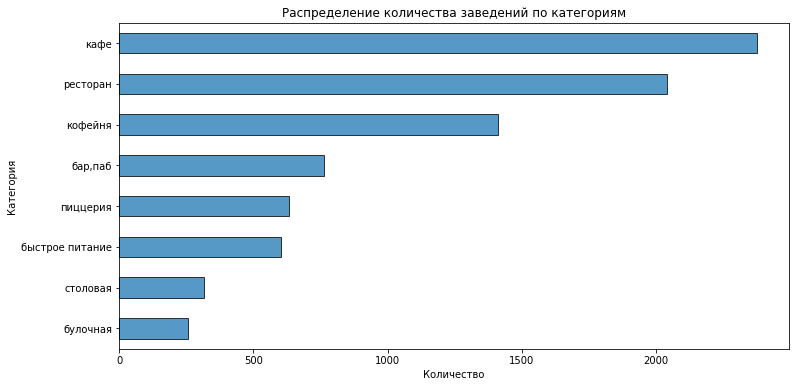

In [35]:
# Создаём контейнер графика matplotlib и задаём его размер
plt.figure(figsize=(12, 6))

# Строим диаграмму с помощью pandas 
df['category'].value_counts().sort_values().plot(
                kind='barh',
                alpha=0.75,
                edgecolor='black',
                rot=0, # Градус вращения подписи по оси Х
)

# Настраиваем оформление графика
plt.title('Распределение количества заведений по категориям')
plt.xlabel('Количество')
plt.ylabel('Категория')

# Выводим график
plt.show()

---

### Задача 2

Какие административные районы Москвы присутствуют в данных? Исследуем распределение количества заведений по административным районам Москвы, а также отдельно распределение заведений каждой категории в Центральном административном округе Москвы. Результат сопроводим подходящими визуализациями.

In [36]:
# Выводим уникальные адинистративные округа
districts = df['district'].unique()
districts

array(['Северный административный округ',
       'Северо-Восточный административный округ',
       'Северо-Западный административный округ',
       'Западный административный округ',
       'Центральный административный округ',
       'Восточный административный округ',
       'Юго-Восточный административный округ',
       'Южный административный округ',
       'Юго-Западный административный округ'], dtype=object)

In [37]:
# Сгруппируем по округам
district_counts = df['district'].value_counts().sort_values()

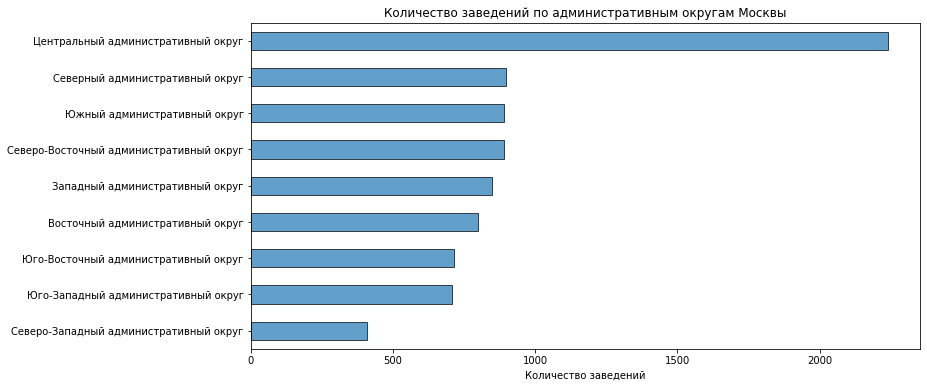

In [38]:
# Создаём контейнер графика matplotlib и задаём его размер
plt.figure(figsize=(12, 6))

# Строим диаграмму с помощью pandas 
district_counts.plot(kind='barh',  
               alpha=0.7,
               edgecolor='black')

# Настраиваем оформление графика
plt.title('Количество заведений по административным округам Москвы')
plt.xlabel('Количество заведений')

plt.show()

- Как и ожидалось в ЦАО наибольшее количество заведений 

Теперь исследуем отдельно распределение заведений каждой категории в Центральном административном округе Москвы

In [39]:
# Отфильтруем только ЦАО
central_district = df[df['district'] == 'Центральный административный округ']

In [40]:
# Сгруппируем по ЦАО
central_district_count = central_district['category'].value_counts().sort_values()

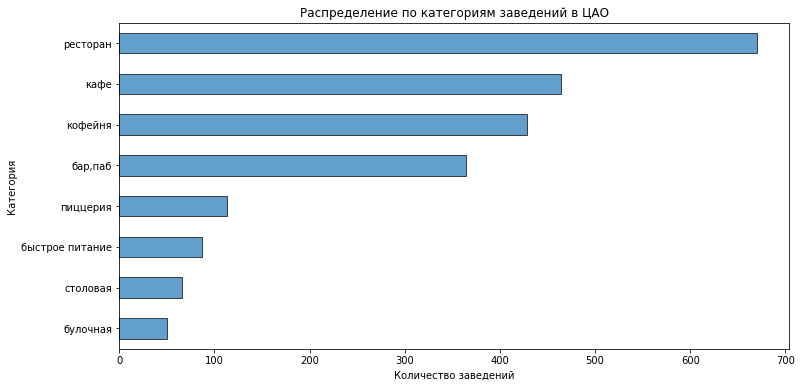

In [41]:
# Создаём контейнер графика matplotlib и задаём его размер
plt.figure(figsize=(12, 6))

# Строим диаграмму с помощью pandas 
central_district_count.plot(kind='barh',  
               alpha=0.7,
               edgecolor='black')

# Настраиваем оформление графика
plt.title('Распределение по категориям заведений в ЦАО')
plt.xlabel('Количество заведений')
plt.ylabel('Категория')

plt.show()

Добавим график по относительным значениям по всем округам г.Москвы

In [42]:
# Рассчитываем относительные значения по всем округам
total = district_counts.sum()
percent = round((district_counts / total * 100),2)

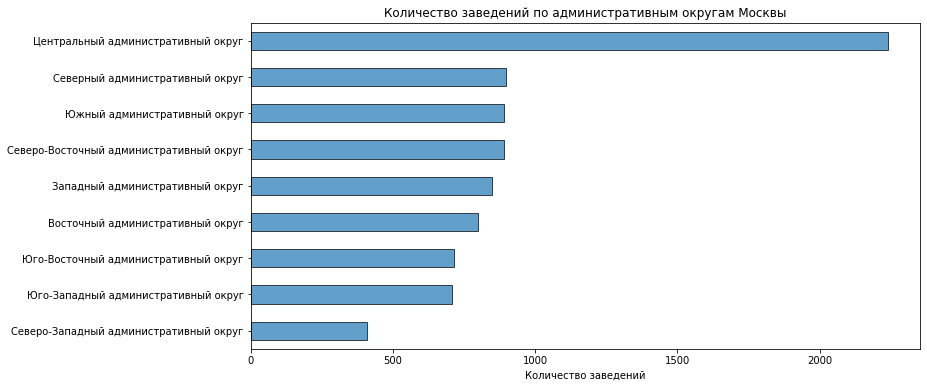

In [43]:
# Создаём контейнер графика matplotlib и задаём его размер
plt.figure(figsize=(12, 6))


# Строим диаграмму с помощью pandas 
ax = district_counts.plot(kind='barh', 
                         alpha=0.7,
                         edgecolor='black')


# Настраиваем оформление
plt.title('Количество заведений по административным округам Москвы')
plt.xlabel('Количество заведений')


plt.show()

Выизуализируем данные по относительным долям в ЦАО г. Москвы

In [44]:
# Рассчитываем относительные значения по ЦАО
total_central  = district_counts.sum()
percent_central  = round((district_counts / total * 100),2)

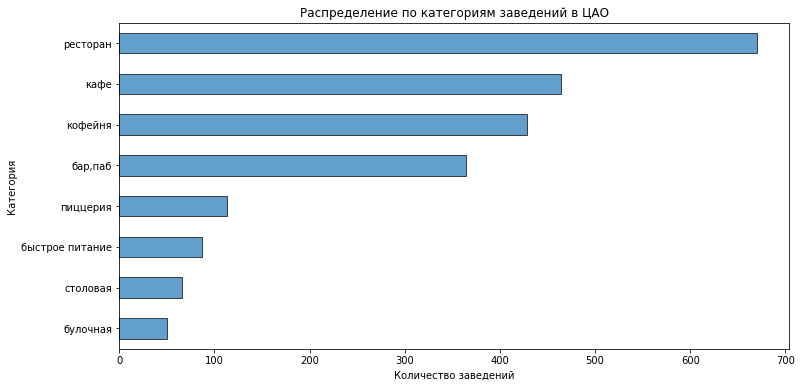

In [45]:
# Создаём контейнер графика matplotlib и задаём его размер
plt.figure(figsize=(12, 6))

# Строим диаграмму с помощью pandas
ax = central_district_count.plot(kind='barh',
                                alpha=0.7,
                                edgecolor='black')

# Настраиваем оформление
plt.title('Распределение по категориям заведений в ЦАО')
plt.xlabel('Количество заведений')
plt.ylabel('Категория')

plt.show()

 - **Результат:** Все округа Москвы предоставлены в данных.Центральный округ лидирует по количеству заведений. В Северо - Западном меньше всего заведений.В ЦАО преобладает количество ресторанов. Чуть меньше кафе\кофеен\баров.

---

### Задача 3

Изучим соотношение сетевых и несетевых заведений в целом по всем данным и в разрезе категорий заведения. Каких заведений больше — сетевых или несетевых? Какие категории заведений чаще являются сетевыми? Исследуем данные, ответим на вопросы и построим необходимые визуализации.

In [46]:
# Считаем количесво сетевых и несетевых заведений 
chain_count = df['chain'].value_counts()
chain_count

0    5199
1    3203
Name: chain, dtype: int64

In [47]:
# Посчитаем общее количество заведений
total = sum(chain_count)

In [48]:
# Посчитаем долю сетевых\несетевых заведений
chain_percent = round(chain_count / total * 100,2)
chain_percent

0    61.88
1    38.12
Name: chain, dtype: float64

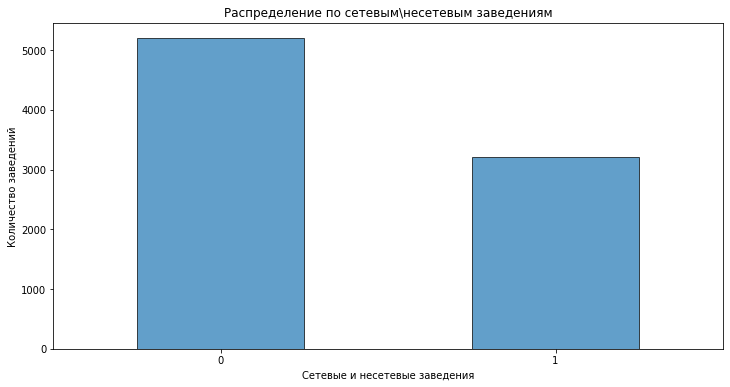

In [49]:
# Создаём контейнер графика matplotlib и задаём его размер
plt.figure(figsize=(12, 6))

# Строим диаграмму с помощью pandas 
chain_count.plot(kind='bar',  
               alpha=0.7,
               edgecolor='black',
               rot = 0)

# Настраиваем оформление графика
plt.title('Распределение по сетевым\несетевым заведениям')
plt.xlabel('Сетевые и несетевые заведения')
plt.ylabel('Количество заведений')

plt.show()

Теперь посчитаем и визуализируем в разрезе категорий заведений

In [50]:
grouped = df.groupby('category')['chain'].value_counts()
grouped

category         chain
бар,паб          0         596
                 1         168
булочная         1         157
                 0          99
быстрое питание  0         371
                 1         232
кафе             0        1597
                 1         779
кофейня          1         720
                 0         693
пиццерия         1         330
                 0         303
ресторан         0        1313
                 1         729
столовая         0         227
                 1          88
Name: chain, dtype: int64

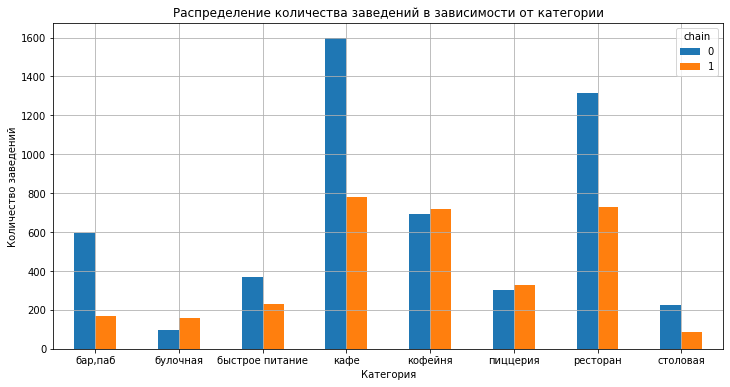

In [51]:
# Построим график столбчатой диаграммы
grouped = df.groupby('category')['chain'].value_counts().unstack(fill_value=0)
grouped.plot(kind='bar',
               title=f'Распределение количества заведений в зависимости от категории',
               legend=True,
               ylabel='Количество заведений',
               xlabel='Категория',
               rot=0,
               figsize=(12, 6))

# Настраиваем оформление графика
plt.grid()

# Выводим график
plt.show()

**Ответим на вопросы.**
 - В целом несетевых заведений больше чем сетевых. Несетевых 5199 заведений что составляет 61,88% от общего количества, а сетевых почти в 1,5 раза меньше 3203 что составляет 38,12% от общего количества заведений.
 - Категории заведений которые чаще являются сетевыми: В категории сетевых больше преобладают булочные,кофейни и пиццерии. Что явно видно на графике. Меньше всего бары и столовые. 

---

### Задача 4

Исследуем количество посадочных мест в заведениях. Встречаются ли в данных аномальные значения или выбросы? Если да, то с чем они могут быть связаны? Приведем для каждой категории заведений наиболее типичное для него количество посадочных мест. Результат сопроводим подходящими визуализациями.


Построим график распределения посадочных мест. Выберем гистограмму

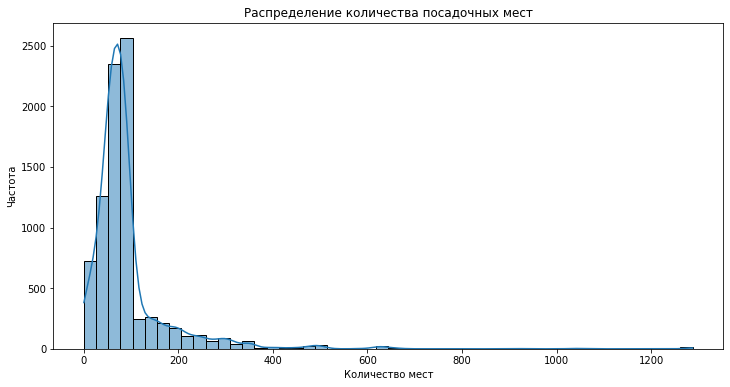

In [52]:
# Создаём контейнер графика matplotlib и задаём его размер
plt.figure(figsize=(12, 6))

# Строим гистограмму распределения мест
sns.histplot(df['seats'], 
             bins=50, 
             kde=True)


plt.title("Распределение количества посадочных мест")
plt.xlabel("Количество мест")
plt.ylabel("Частота")

plt.show()

 - Гистограмма показывает, что большинство заведений имеют менее 100 мест но есть и заведения с более 300 и даже более 1000 местами.

Построим график распределения посадочных мест по категориям. Столбчатую диаграмму

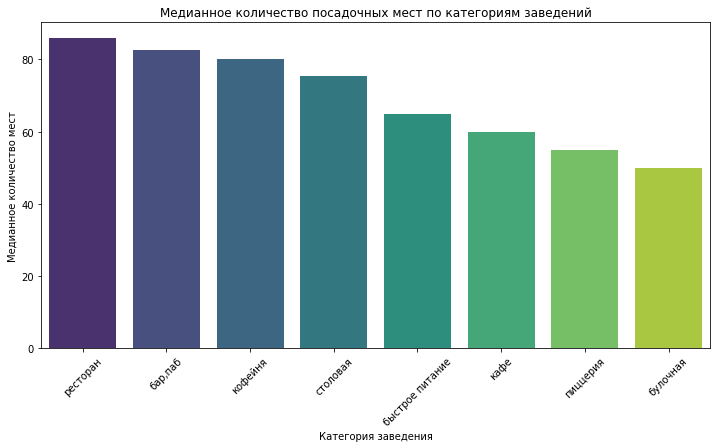

In [53]:
# Создаём контейнер графика matplotlib и задаём его размер
plt.figure(figsize=(12, 6))

# Считаем медианы по категориям
median_seats = df.groupby('category')['seats'].median().sort_values(ascending=False)

# Визуализируем 
sns.barplot(x=median_seats.index, 
            y=median_seats.values,
            palette='viridis')

# Настраиваем оформление графика
plt.title('Медианное количество посадочных мест по категориям заведений')
plt.xlabel('Категория заведения')
plt.ylabel('Медианное количество мест')
plt.xticks(rotation=45)


plt.show()

- График показывает что лидируют по количеству посадочных мест рестораны. Далее идут пабы,кофейни и столовые. Мнешье всего посадочных мест в пиццериях и булочных.

---

### Задача 5

Исследуем рейтинг заведений. Визуализируем распределение средних рейтингов по категориям заведений. Сильно ли различаются усреднённые рейтинги для разных типов общепита?

Построим график распределения рейтингов. Выберем гистограмму

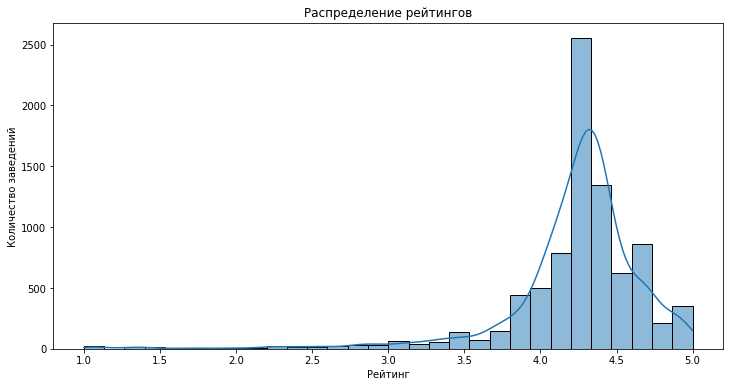

In [54]:
# Создаём контейнер графика matplotlib и задаём его размер
plt.figure(figsize=(12, 6))

# Строим гистограмму по рейтингам
sns.histplot(df['rating'], 
             bins=30, 
             kde=True)


plt.title("Распределение рейтингов")
plt.xlabel("Рейтинг")
plt.ylabel("Количество заведений")

plt.show()

- Гистограмма показывает что большинство заведений имеют рейтинг 4.0-4.8

Построим график распределения рейтингов по категориям. Выберем столбчатую диаграмму

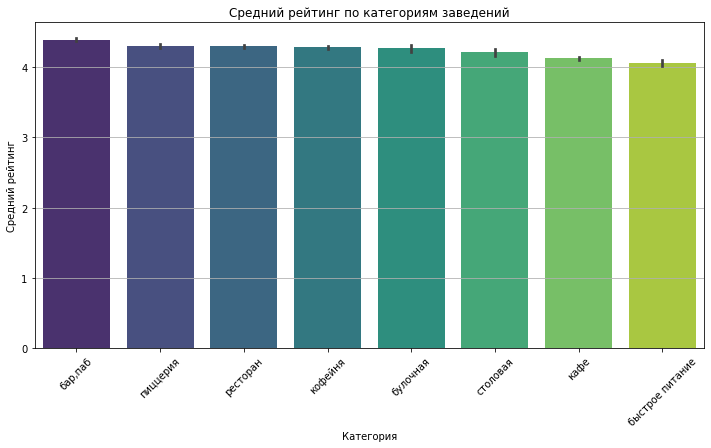

In [55]:
# Создаём контейнер графика matplotlib и задаём его размер
plt.figure(figsize=(12, 6))

# Сортируем категории по среднему рейтингу
category_order = df.groupby('category')['rating'].mean().sort_values(ascending=False).index

# Создаем визуализацию
sns.barplot(data=df,
            x='category',
            y='rating',
            palette='viridis',
            order=category_order) 

# Настраиваем оформление графика
plt.title('Средний рейтинг по категориям заведений')
plt.xlabel('Категория')
plt.ylabel('Средний рейтинг')
plt.xticks(rotation=45)
plt.grid(axis='y')


plt.show()

- График подтверждает что большинство заведений имеют рейтинг 4.0-4.8. 

---

### Задача 6

Изучим, с какими данными показывают самую сильную корреляцию рейтинги заведений? Построим и визуализируем матрицу корреляции рейтинга заведения с разными данными: его категория, положение (административный район Москвы), статус сетевого заведения, количество мест, ценовая категория и признак, является ли заведения круглосуточным. Выберем самую сильную связь и проверьте её.

In [56]:
# Выбираем нужные для анализа столбцы
cols = ['rating', 'category', 'district', 'chain', 'seats', 'price', 'is_24_7']
filter_cols = df[cols]

In [57]:
# Вычисляем корреляционную матрицу с использованием phi_k
correlation_matrix = filter_cols.phik_matrix(interval_cols=['rating'])
correlation_matrix

,rating,category,district,chain,seats,price,is_24_7
rating,1.000000,0.189716,0.200761,0.107833,0.134045,0.281253,0.144951
category,0.189716,1.000000,0.174584,0.266000,0.909136,0.329690,0.230250
district,0.200761,0.174584,1.000000,0.064473,0.632498,0.203032,0.065881
chain,0.107833,0.266000,0.064473,1.000000,0.165234,0.088834,0.050736
seats,0.134045,0.909136,0.632498,0.165234,1.000000,0.360710,0.174819
price,0.281253,0.329690,0.203032,0.088834,0.360710,1.000000,0.058342
is_24_7,0.144951,0.230250,0.065881,0.050736,0.174819,0.058342,1.000000


Для визуализации выберем тепловую карту `heatmap`

In [58]:
# Создаём контейнер графика matplotlib и задаём его размер
plt.figure(figsize=(10, 8))

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

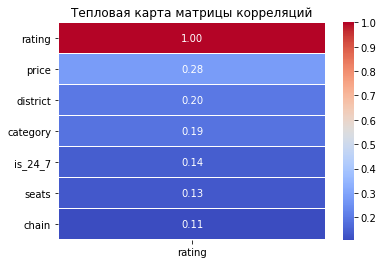

In [59]:
# Создаем визуализацию
sns.heatmap(correlation_matrix[['rating']].sort_values('rating', ascending=False),
            annot=True, 
            cmap='coolwarm',
            linewidths=0.5,
            fmt=".2f")

# Настраиваем оформление графика
plt.title('Тепловая карта матрицы корреляций')

plt.show()

- По графику видно что наибольшая корреляция с рейтингом у `price`: 0.281

Проверим эту связь. Визуализируем с помощью `boxplot`

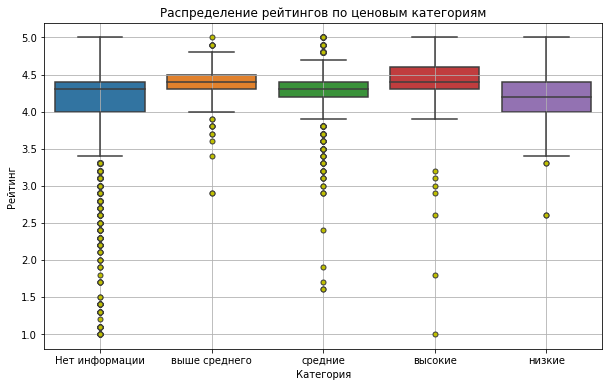

In [60]:
# Создаём контейнер графика matplotlib и задаём его размер
plt.figure(figsize=(10, 6))


# Создаем визуализацию
sns.boxplot(data=df, x='price', y='rating', 
           flierprops = dict(markerfacecolor = 'y',
            marker = 'o'))

# Настраиваем оформление графика
plt.title('Распределение рейтингов по ценовым категориям')
plt.xlabel('Категория')
plt.ylabel('Рейтинг')
plt.grid()


plt.show()

 - Из графика видно что у дорогих заведений разброс рейтинга меньше.Недорогие заведения имеют более широкий разброс оценок.Сильная связь между ценовой категорией и рейтингом подтверждается ростом медианы рейтинга с увеличением цены.

<div class="alert alert-block alert-success">✔️
    

__Комментарий от ревьюера №1__

Тут согласен

---

### Задача 7

Сгруппируем данные по названиям заведений и найдем топ-15 популярных сетей в Москве. Для них посчитаем значения среднего рейтинга. Под популярностью понимается количество заведений этой сети в регионе. К какой категории заведений они относятся? Результат сопроводим подходящими визуализациями.

In [61]:
# Сгруппируем и посчитаем средний рейтинг
top_chains = df[df['chain'] == 1].groupby('name').agg(
    num_locations=('id', 'count'),
    avg_rating=('rating', 'mean')
)
# Отсортируем top_chains
top_chains = top_chains.sort_values('num_locations', ascending=False)

In [62]:
# Выведем топ-15
top_15_chains = top_chains.head(15)
top_15_chains

,num_locations,avg_rating
name,,
Шоколадница,120,4.177500
Домино'с Пицца,76,4.169737
Додо Пицца,74,4.286486
One Price Coffee,71,4.064789
Яндекс Лавка,69,3.872464
Cofix,65,4.075385
Prime,50,4.116000
Хинкальная,44,4.322727
КОФЕПОРТ,42,4.147619


Визуализируем это с помощью подходящего графика. Выберем 

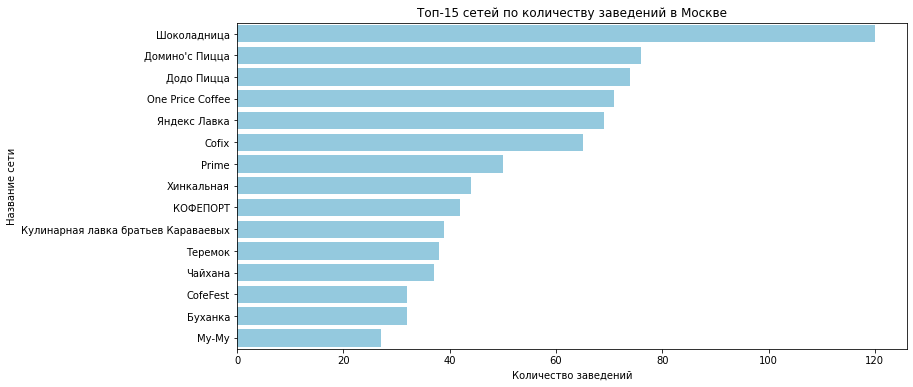

In [63]:
# Создаём контейнер графика matplotlib и задаём его размер
plt.figure(figsize=(12, 6))

# Создаем визуализацию
sns.barplot(
    x='num_locations', 
    y='name',
    color = 'skyblue',
    data=top_15_chains.reset_index()
)
# Настраиваем график
plt.title('Топ-15 сетей по количеству заведений в Москве')
plt.xlabel('Количество заведений')
plt.ylabel('Название сети')

plt.show()

- На графике видно лидеров по количеству заведений. Шоколадница опережает остальные сети. Далее идут пиццерии

In [64]:
# Создаем таблицу
result = pd.DataFrame({
    'num_locations': top_15_chains['num_locations'],
    'avg_rating': top_15_chains['avg_rating']
})

# Добавляем категорию
for chain_name in result.index:
    chain = df[df['name'] == chain_name]
    counts = chain['category'].value_counts()
    category = counts.index[0]
    result.loc[chain_name, 'category'] = category


# Выводим результат
result

,num_locations,avg_rating,category
name,,,
Шоколадница,120,4.177500,кофейня
Домино'с Пицца,76,4.169737,пиццерия
Додо Пицца,74,4.286486,пиццерия
One Price Coffee,71,4.064789,кофейня
Яндекс Лавка,69,3.872464,ресторан
Cofix,65,4.075385,кофейня
Prime,50,4.116000,ресторан
Хинкальная,44,4.322727,кафе
КОФЕПОРТ,42,4.147619,кофейня


Создадим визуализацию со средним рейтингом для заведений. Выберем столбчатую диаграмму

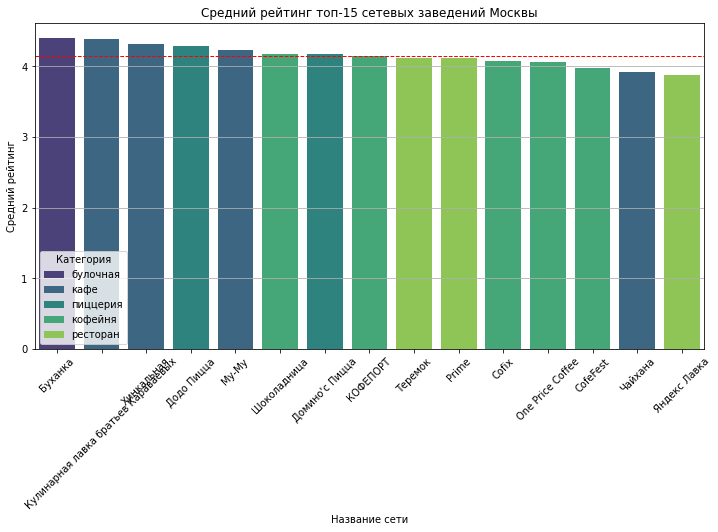

In [65]:
# Создаём контейнер графика matplotlib и задаём его размер
plt.figure(figsize=(12, 6))

# Сортируем данные 
result_sorted = result.reset_index().sort_values('avg_rating', ascending=False)

# # Создаем визуализацию
ax = sns.barplot(
    data=result_sorted,
    x='name',
    y='avg_rating',
    hue='category',
    palette='viridis',
    dodge=False
)

# Добавляем axhline со средним рейтингом
mean_rating = result['avg_rating'].mean()
ax.axhline(mean_rating, 
           color='red', 
           linestyle='--', 
           linewidth=1)


# Настраиваем оформление
plt.title('Средний рейтинг топ-15 сетевых заведений Москвы')
plt.xlabel('Название сети')
plt.ylabel('Средний рейтинг')
plt.xticks(rotation=45)
plt.legend(title='Категория')
plt.grid(axis='y')


plt.show()

Создадим визуализацию среднего рейтинга по категориям. Посмотрим каким образом распределяется рейтинг

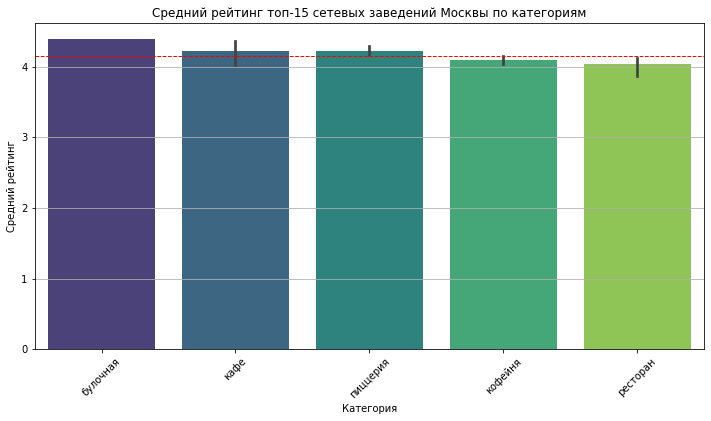

In [66]:
# Создаём контейнер графика matplotlib и задаём его размер
plt.figure(figsize=(12, 6))

# Сортируем данные 
result_sorted = result.reset_index().sort_values('avg_rating', ascending=False)

# Создаем визуализацию
ax = sns.barplot(
    data=result_sorted,
    x='category',
    y='avg_rating',
    palette='viridis',
    dodge=False
)

# Добавляем axhline со средним рейтингом
mean_rating = result['avg_rating'].mean()
ax.axhline(mean_rating, 
           color='red', 
           linestyle='--', 
           linewidth=1)


# Настраиваем оформление
plt.title('Средний рейтинг топ-15 сетевых заведений Москвы по категориям')
plt.xlabel('Категория')
plt.ylabel('Средний рейтинг')
plt.xticks(rotation=45)
plt.grid(axis='y')


plt.show()

- По графику видно что лидеры в рейтинге булочные,кафе и пиццерии.Рестораны показывают самый низкий рейтинг.

---

### Задача 8

Изучим вариацию среднего чека заведения (столбец `middle_avg_bill`) в зависимости от района Москвы. Проанализируем цены в Центральном административном округе и других. Как удалённость от центра влияет на цены в заведениях? Результат сопроводим подходящими визуализациями.


In [67]:
# Отсортируем заполненые пропуски
df = df[df['middle_avg_bill'] > 0]

In [68]:
# Выведем значения по округам
district_stats = df.groupby('district')['middle_avg_bill'].describe()
district_stats

,count,mean,std,min,25%,50%,75%,max
district,,,,,,,,
Восточный административный округ,260.0,820.626923,850.903310,50.0,338.00,575.0,1100.0,10000.0
Западный административный округ,306.0,1053.225490,779.008536,50.0,427.50,1000.0,1500.0,5250.0
Северный административный округ,322.0,927.959627,912.609221,130.0,350.00,650.0,1250.0,11000.0
Северо-Восточный административный округ,301.0,716.611296,591.232153,50.0,325.00,500.0,950.0,4500.0
Северо-Западный административный округ,157.0,822.222930,595.055218,120.0,340.00,700.0,1100.0,2900.0
Центральный административный округ,1059.0,1192.182247,919.720051,67.0,500.00,1000.0,1500.0,7250.0
Юго-Восточный административный округ,194.0,654.097938,566.825663,30.0,281.25,450.0,887.5,3750.0
Юго-Западный административный округ,235.0,792.561702,559.173122,100.0,350.00,600.0,1100.0,2750.0
Южный административный округ,314.0,834.398089,2008.640596,100.0,350.00,500.0,1037.5,35000.0


Посмотрим распределение среднего чека по округам. Выберем в кчаестве визуализации `boxplot`

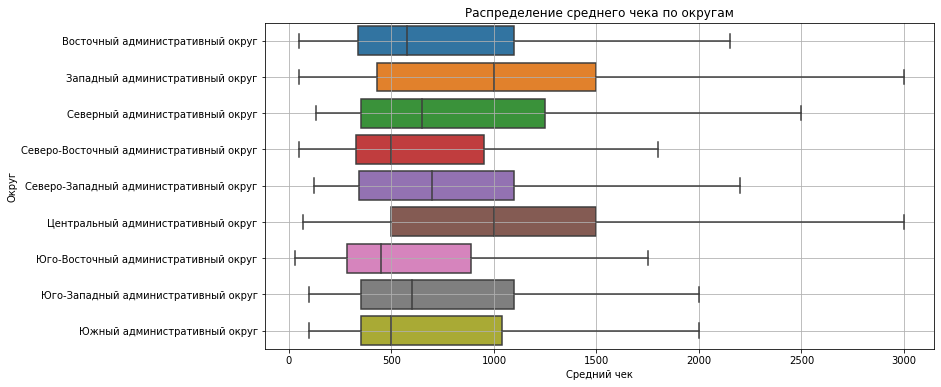

In [69]:
# Создаём контейнер графика matplotlib и задаём его размер
plt.figure(figsize=(12, 6))


# Создаем визуализацию
sns.boxplot(
    data=df,
    x='middle_avg_bill',
    y='district',
    order=district_stats.index,
    showfliers=False
)
# Настраиваем оформление
plt.title('Распределение среднего чека по округам')
plt.xlabel('Средний чек')
plt.ylabel('Округ')
plt.grid()


plt.show()

Визуализируем сравнение среднего чека и медианы.

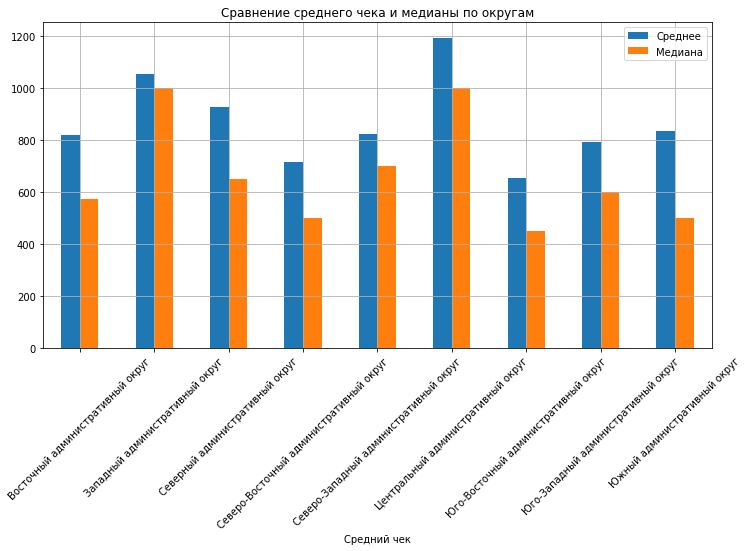

In [70]:
# Создаем визуализацию
district_stats[['mean', '50%']].plot(kind='bar',
                                     rot = 45,
                                    figsize=(12, 6))

# Настраиваем оформление
plt.title('Сравнение среднего чека и медианы по округам')
plt.xlabel('Средний чек')
plt.legend(['Среднее', 'Медиана'])
plt.grid(True)


plt.show()

- Самый дорогой средний чек (1192 рублей) медиана (1000 рублей) в ЦАО. Юго-Восточный округ самый бюджетный. У него средний чек (654 рубля) а  медиана (450 рублей)

Теперь посчитаем средний чек удалённости от центра.

In [71]:
# Отфильтруем данные
central = df[df['district'] == 'Центральный административный округ']['middle_avg_bill']
not_central = df[df['district'] != 'Центральный административный округ']['middle_avg_bill']

# Рассчитываем средние значения
central_avg = central.mean().round()
not_central_avg = not_central.mean().round()

print(f'Средний чек в ЦАО: {central_avg} руб.')
print(f'Средний чек в других округах: {not_central_avg} руб.')

# Посчитаем разницу 
diff_avg = round(central_avg - not_central_avg,2)
perc_diff = round(((central_avg / not_central_avg)-1) * 100,2)

print(f'Разница: {diff_avg} руб. на {perc_diff}% выше')

Средний чек в ЦАО: 1192.0 руб.
Средний чек в других округах: 840.0 руб.
Разница: 352.0 руб. на 41.9% выше


Визуализируем данные с помощью столбчатой диаграммы

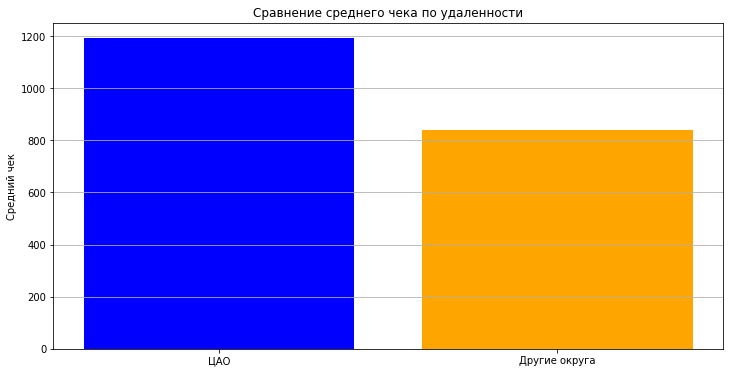

In [72]:
# Данные для графика
data = {'ЦАО': central_avg, 'Другие округа': not_central_avg}

# Создаём контейнер графика matplotlib и задаём его размер
plt.figure(figsize=(12, 6))

# Создаем визуализацию
plt.bar(data.keys(), 
        data.values(), 
        color=['blue', 'orange'])

# Настраиваем оформление
plt.title('Сравнение среднего чека по удаленности')
plt.ylabel('Средний чек')
plt.grid(axis='y')


plt.show()

 - График показывает что средний чек в центре (1192 рубля) на 42 процента выше чем в отальных округах (840 руб.) что подвтерждает что удаленность от центра снижает цены в заведениях.

---


## Итоговый вывод и рекомендации
 - По результатам проведённого исследовательского анализа данных сформулируем итоговый вывод и рекомендации для заказчика. Постараемся акцентировать внимание на ключевых моментах исследования.
 
### Общий обзор проделанной работы.
Был проведён анализ данных о заведениях общественного питания Москвы.

 - Распределение заведений по категориям и районам

 - Соотношение сетевых и несетевых заведений

 - Вместимость заведений и рейтинги

 - Влияние местоположения на средний чек

 - Взаимосвязи между ключевыми параметрами

 - Топ сетевых заведений
 
 ### Ответы на исследовательские вопросы, или главные выводы.
 
  - Наибольшее число объектов — кафе (2376 заведений) и рестораны (2042 заведения).В ЦАО преобладают рестораны, в других округах  кафе.Центральный округ (ЦАО) лидирует по количеству заведений. Наименьшее число объектов — в Северо-Западном округе.

- Несетевых заведений больше чем сетевых. Несетевых 5199 заведений что составляет 61,88% от общего количества, а сетевых почти в 1,5 раза меньше 3203 что составляет 38,12% от общего количества заведений.Категории заведений которые чаще являются сетевыми: В категории сетевых больше преобладают булочные,кофейни и пиццерии.Меньше всего бары и столовые.

- Вместимость заведений. В данных присутсвует наличие сильных выбросов в категориях. Во всех категориях встречаются заведения с более 500 местами. Причины выбросов вероятнее всего ошибки в данных. График показывает что лидируют по количеству посадочных мест рестораны. Далее идут пабы,кофейни и столовые. Мнешье всего посадочных мест в пиццериях и булочных.. Из анализа следует что большинство заведений имеют рейтинг 4.0-4.8. В некоторых категориях более широкий разброс оценок.Видно различие в медианах по категориям. Среднии категории отличаются незначительно.Самая сильная корреляция у рейтингов с ценой.

- В топе заведений находятся булочные,кафе и пиццерии.Рестораны показывают самый низкий рейтинг.

- Самый дорогой средний чек (1192 рублей) медиана (1000 рублей) в ЦАО. Юго-Восточный округ самый бюджетный. У него средний чек (654 рубля) а  медиана (450 рублей).Средний чек в центре на 42 процента выше чем в отальных округах что подвтерждает что удаленность от центра снижает цены в заведениях.

### Рекомендации
 - Для открытия нового заведения в ЦАО ориентироваться на рестораны, кафе — высокий спрос.В остальных округах развивать кафе и столовые со средними ценами. Для сетевых проектов: выбирать фастфуд или кофейни популярный формат. Делать акцент на рейтинг.Для повышения рейтинга улучшать соотношение цена/качество(сильная взаимосвязь). 


